In [1]:
import ic_sets, auction_data
hist_plot = auction_data.hist_plot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
%matplotlib inline

In [2]:
tsuchiura_data = auction_data.AuctionData('tests/reference_data/tsuchiura_data.csv')
ic_solver = ic_sets.ICSets(rho_p=.001, rho_m=.001, auction_data=tsuchiura_data, 
                           k=.1, t=.05, m=.5)

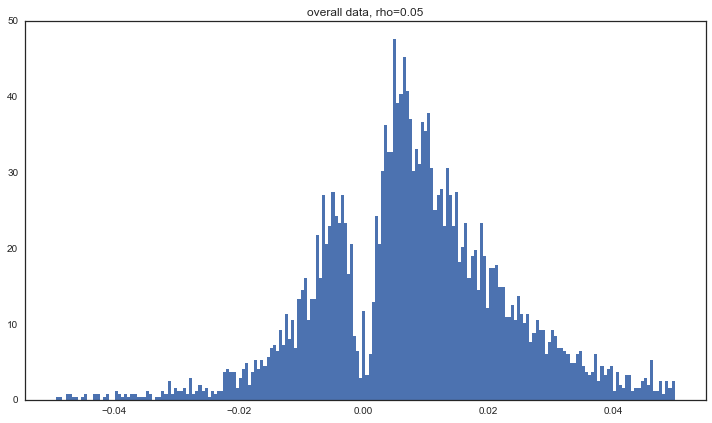

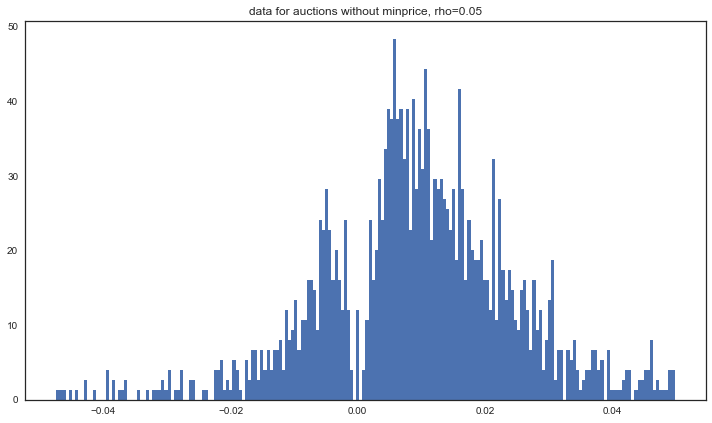

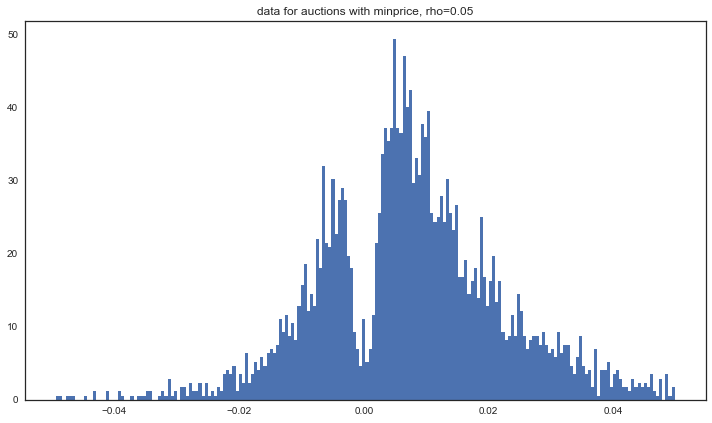

In [3]:
delta = tsuchiura_data.df_bids.norm_bid - tsuchiura_data.df_bids.most_competitive
rho = .05
delta = delta[delta.between(-rho, rho)]
hist_plot(delta,'overall data, rho={}'.format(rho))
hist_plot(delta[tsuchiura_data.df_bids.minprice.isnull()], 
          'data for auctions without minprice, rho={}'.format(rho))
hist_plot(delta[~tsuchiura_data.df_bids.minprice.isnull()], 
          'data for auctions with minprice, rho={}'.format(rho))

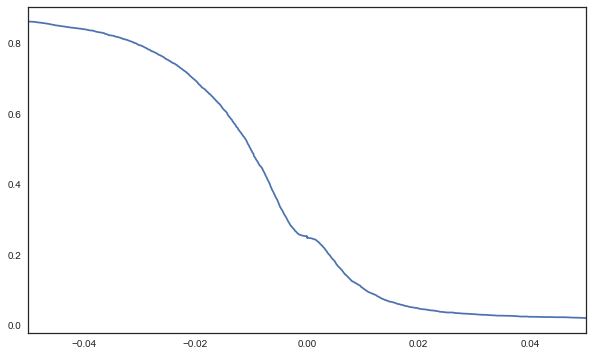

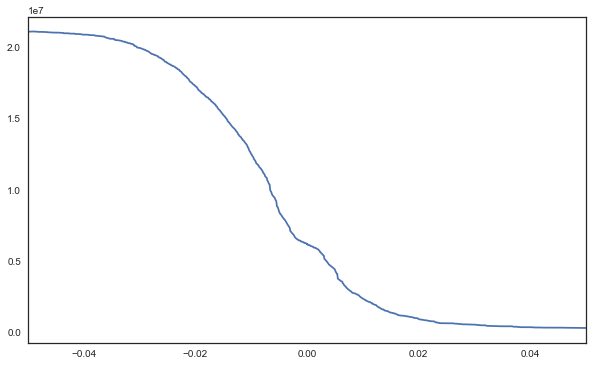

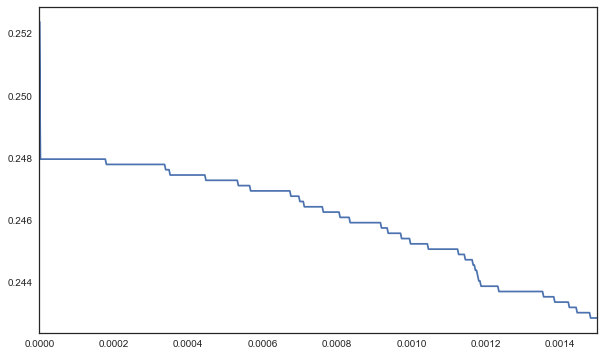

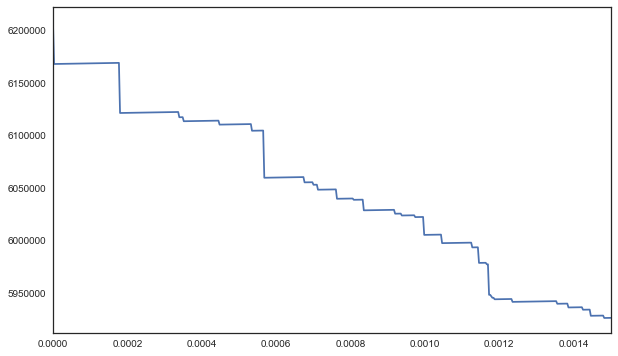

(<matplotlib.axes._subplots.AxesSubplot at 0x7f79a3f61310>, None)

In [4]:
tsuchiura_data.get_counterfactual_demand(.05,.05).demand.plot(figsize = (10,6)), plt.show()
tsuchiura_data.get_counterfactual_demand(.05,.05).revenue.plot(figsize = (10,6)), plt.show()
tsuchiura_data.get_counterfactual_demand(.0015,.0).demand.plot(figsize = (10,6)), plt.show()
tsuchiura_data.get_counterfactual_demand(.0015,.0).revenue.plot(figsize = (10,6)), plt.show()

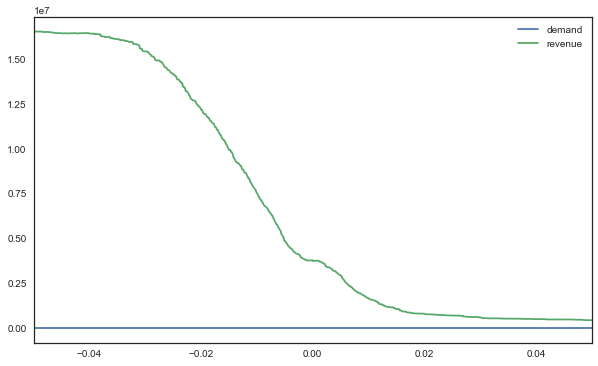

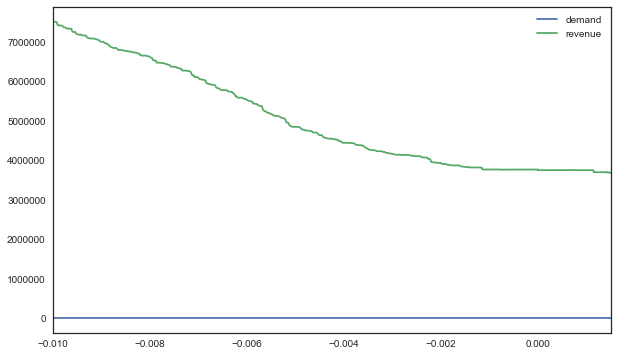

In [5]:
tsuchiura_data.set_bid_data(tsuchiura_data.df_bids[tsuchiura_data.df_bids.minprice.isnull()])
tsuchiura_data.get_counterfactual_demand(.05,.05).plot(figsize = (10,6)), plt.show()
tsuchiura_data.get_counterfactual_demand(.0015,.01).plot(figsize = (10,6))

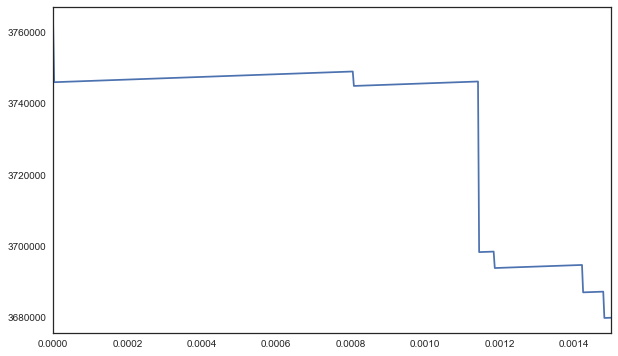

In [6]:
tsuchiura_data.get_counterfactual_demand(.0015,.0).revenue.plot(figsize = (10,6))

In [7]:
df_bids = tsuchiura_data.df_bids

In [8]:
df_bids['revenue'] = 0
df_bids['revenue'] = df_bids.sample_D * df_bids.bid

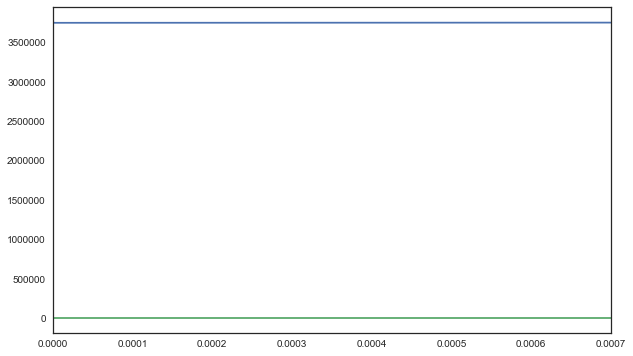

In [9]:
r = tsuchiura_data.get_counterfactual_demand(.0007,.0).revenue

r.plot(figsize=(10,6))

r = r[r.index>0]
r = r.sort_index()
r.index[100]

e = (r - r.iloc[0])/(r.iloc[0] * r.index )
e.plot()

In [10]:
tsuchiura_data.get_bid_gaps().quantile(.1)

0    0.001249
Name: 0.1, dtype: float64

In [11]:
print np.mean(tsuchiura_data.df_bids.most_competitive == tsuchiura_data.df_bids.norm_bid)

print np.mean(tsuchiura_data.df_auctions.lowest == tsuchiura_data.df_auctions.second_lowest)

print np.mean(tsuchiura_data.df_bids.tied_winner)

0.00493421052632
0.0100755667506
0.0104166666667


/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


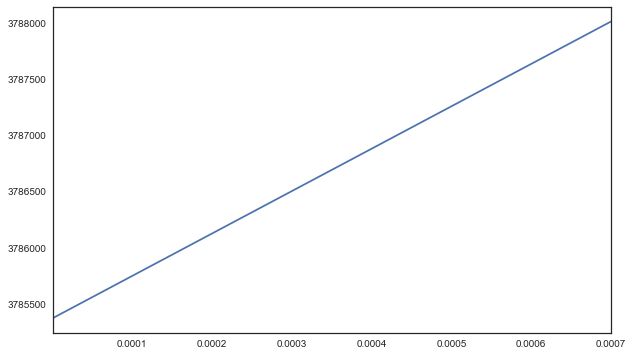

0.99598918960930416

In [12]:
lower_bound_share_non_competitive = {'epsilon_down':0, 'rho_p':0}

lower_bound_share_non_competitive['epsilon_down'] = \
    np.mean(tsuchiura_data.df_auctions.lowest == tsuchiura_data.df_auctions.second_lowest)

tsuchiura_data.set_bid_data(tsuchiura_data.df_bids[
        tsuchiura_data.df_bids.tied_winner == 0
    ])
rho_p = .0007
r = tsuchiura_data.get_counterfactual_demand(rho_p,.0).revenue
r = r.loc[r.index>0]
r.plot(figsize=(10,6)), plt.show()
r = r.sort_index()
r.head()

e = (r.iloc[1:] - r.iloc[1])/(r.iloc[1] * r.index[1:] )
e[rho_p]



In [13]:
tsuchiura_data.df_bids.minprice.isnull().mean()

1.0